In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os



/kaggle/working
441
(250, 250)


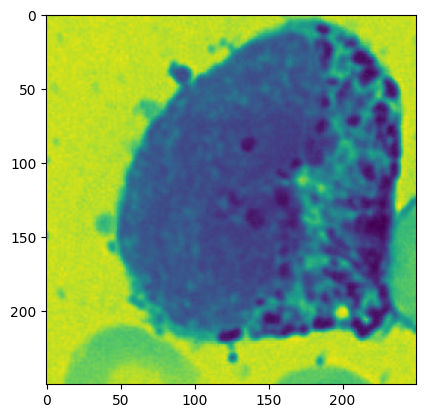

In [47]:
image_directory = "../input/bone-marrow-cell-classification/bone_marrow_cell_dataset"
mother_directory = os.getcwd()
print(mother_directory)

list_of_files = os.listdir(image_directory)
sample_image_dir = image_directory + "/" + list_of_files[0]

sample_image_list = os.listdir(sample_image_dir)
print(len(sample_image_list))

image = cv2.imread(sample_image_dir + "/" + sample_image_list[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
print(image.shape)

In [48]:
train_dir = "../input/bone-marrow-cell-classification/bone_marrow_cell_dataset"
validation_dir = "../input/bone-marrow-cell-classification/bone_marrow_cell_dataset"

In [49]:
ART_file_list = os.listdir(image_directory + "/" + "ART")
BLA_file_list = os.listdir(image_directory + "/" + "BLA")
EBO_file_list = os.listdir(image_directory + "/" + "EBO")
EOS_file_list = os.listdir(image_directory + "/" + "EOS")
LYT_file_list = os.listdir(image_directory + "/" + "LYT")
MMZ_file_list = os.listdir(image_directory + "/" + "MMZ")
MON_file_list = os.listdir(image_directory + "/" + "MON")
MYB_file_list = os.listdir(image_directory + "/" + "MYB")


ART_directory = image_directory + "/" + "ART/" + ART_file_list[0]
BLA_directory = image_directory + "/" + "BLA/" + BLA_file_list[0]
EBO_directory = image_directory + "/" + "EBO/" + EBO_file_list[0]
EOS_directory = image_directory + "/" + "EOS/" + EOS_file_list[0]
LYT_directory = image_directory + "/" + "LYT/" + LYT_file_list[2]
MMZ_directory = image_directory + "/" + "MMZ/" + MMZ_file_list[0]
MON_directory = image_directory + "/" + "MON/" + MON_file_list[0]
MYB_directory = image_directory + "/" + "MYB/" + MYB_file_list[0]

In [78]:
train_data = []
label_data = []

liste_ART = os.listdir(ART_directory)
liste_BLA = os.listdir(BLA_directory)
liste_EBO = os.listdir(EBO_directory)
liste_EOS = os.listdir(EOS_directory)
liste_LYT = os.listdir(LYT_directory)
liste_MMZ = os.listdir(MMZ_directory)
liste_MON = os.listdir(MON_directory)
liste_MYB = os.listdir(MYB_directory)


for name in range(200):
    image = cv2.imread(ART_directory + "/" + liste_ART[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([1,0,0,0,0,0,0])

'''for name in range(100):
    image = cv2.imread(BLA_directory + "/" + liste_BLA[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,1,0,0,0,0,0]) '''

for name in range(200):
    image = cv2.imread(EBO_directory + "/" + liste_EBO[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,1,0,0,0,0,0])
    
    
for name in range(200):
    image = cv2.imread(EOS_directory + "/" + liste_EOS[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,0,1,0,0,0,0])

    
for name in range(200):
    image = cv2.imread(LYT_directory + "/" + liste_LYT[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,0,0,1,0,0,0])
    
for name in range(200):
    image = cv2.imread(MMZ_directory + "/" + liste_MMZ[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,0,0,0,1,0,0])
    
    
for name in range(200):
    image = cv2.imread(MON_directory + "/" + liste_MON[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,0,0,0,0,1,0])
    
for name in range(200):
    image = cv2.imread(MYB_directory + "/" + liste_MYB[name])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(image)
    label_data.append([0,0,0,0,0,0,1])

In [79]:
len(train_data)

1400

In [84]:
X = np.array(train_data)
y = np.array(label_data)
X=X.reshape(X.shape[0], 250, 250, 1)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=20)

In [87]:
#We create a simple Convolutional model without regularization methods to find a baseline
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,(1,1),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(7,activation="softmax"))

In [89]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train/255, y_train, epochs=10,validation_data = (X_test/255,y_test))


Epoch 1/10
40/40 [==============================] - 38s 902ms/step - loss: 1.9459 - accuracy: 0.1278 - val_loss: 1.9399 - val_accuracy: 0.1143
Epoch 2/10
40/40 [==============================] - 36s 894ms/step - loss: 1.9243 - accuracy: 0.1802 - val_loss: 1.8740 - val_accuracy: 0.2214
Epoch 3/10
40/40 [==============================] - 35s 887ms/step - loss: 1.7943 - accuracy: 0.2698 - val_loss: 1.7372 - val_accuracy: 0.3071
Epoch 4/10
40/40 [==============================] - 36s 896ms/step - loss: 1.6834 - accuracy: 0.3444 - val_loss: 1.6717 - val_accuracy: 0.3571
Epoch 5/10
40/40 [==============================] - 36s 887ms/step - loss: 1.6106 - accuracy: 0.3984 - val_loss: 1.6441 - val_accuracy: 0.3143
Epoch 6/10
40/40 [==============================] - 35s 878ms/step - loss: 1.5507 - accuracy: 0.3976 - val_loss: 1.5935 - val_accuracy: 0.3929
Epoch 7/10
40/40 [==============================] - 35s 886ms/step - loss: 1.4797 - accuracy: 0.4437 - val_loss: 1.6273 - val_accuracy: 0.3643

In [90]:
print(y_test)

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 

In [92]:
loss, accuracy = model.evaluate(X_test/255, y_test)

# Print the accuracy
print('Accuracy on validation set:', accuracy)


5/5 [==============================] - 1s 214ms/step - loss: 1.6583 - accuracy: 0.3929
Accuracy on validation set: 0.3928571343421936  and loss is:  1.658261775970459


In [95]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [96]:
predictions = probability_model.predict(X_test)

5/5 [==============================] - 1s 212ms/step


In [97]:
predictions[0]

array([0.31179103, 0.11470152, 0.11470152, 0.11470152, 0.11470152,
       0.11470152, 0.11470152], dtype=float32)

In [103]:
y_test[0]

array([0, 0, 0, 1, 0, 0, 0])

In [107]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label_index = np.argmax(true_label)

    if predicted_label == true_label_index:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                          100*np.max(predictions_array),
                                          true_label_index),
                                          color=color)

def plot_value_array(i, predictions_array, true_label, class_names):
    plt.grid(False)
    plt.xticks(range(7), class_names)
    plt.yticks([])
    thisplot = plt.bar(range(7), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    true_label_index = np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label_index].set_color('blue')


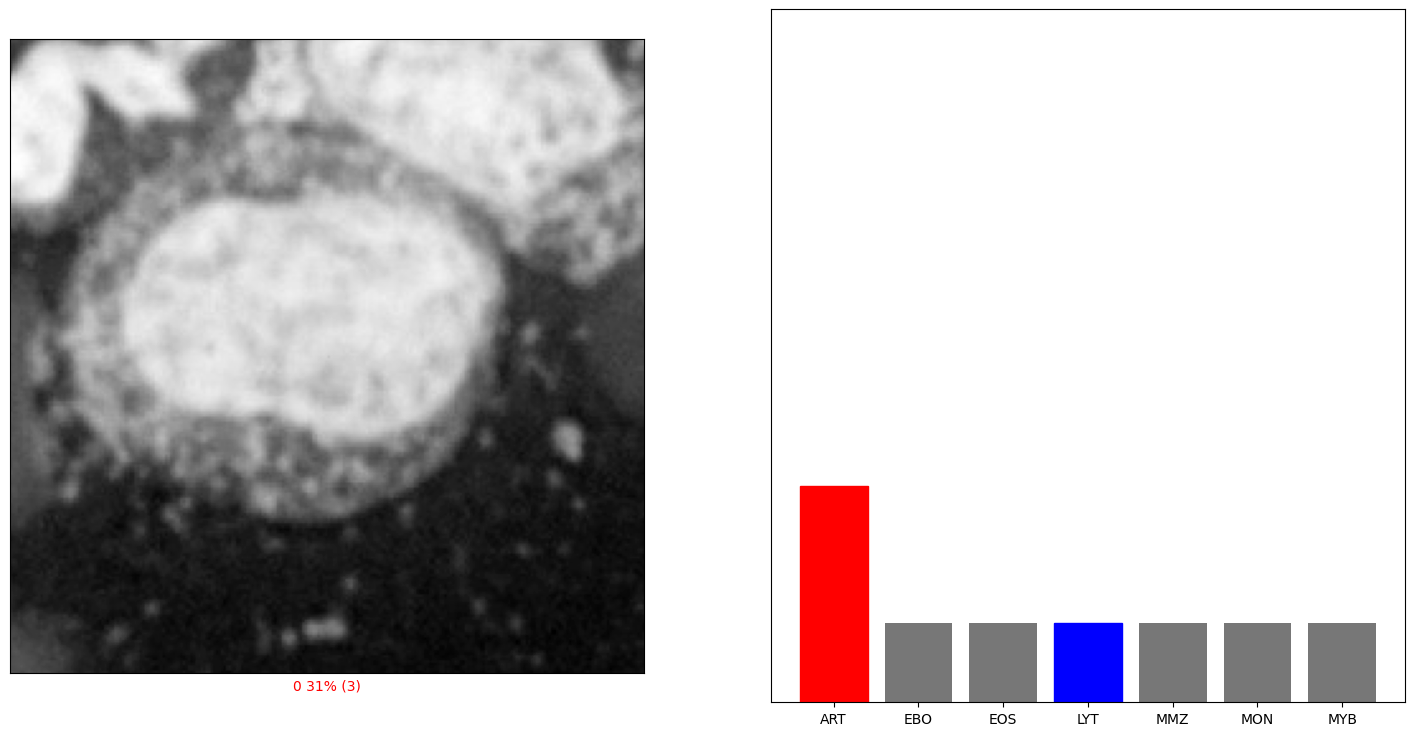

In [114]:
#Verifying predictions:

i = 102 #i th image to show

plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, X_test[i])

plt.subplot(1, 2, 2)

class_names = ["ART", "EBO", "EOS", "LYT", "MMZ", "MON", "MYB"]

plot_value_array(i, predictions[i], y_test, class_names)
plt.show()
